# Bike Sharing Analysis

Where do Capital Bikeshare riders go? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions since we launched in 2010, and we're glad to provide the data that shows you the answers from our first trip to today. This is a dataset from Capital Bikeshare regarding bike users in Washington DC.

Duration – Duration of trip

Start Date – Includes start date and time

End Date – Includes end date and time

Start Station – Includes starting station name and number

End Station – Includes ending station name and number

Bike Number – Includes ID number of bike used for the trip

Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure).

## Importing the Analysis and Visualization Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the CSV File

In [2]:
bike = pd.read_csv("trip.csv")

Let's now view the head of the data that we've imported.

In [3]:
bike.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,435,01/08/18 0:00,01/08/18 0:08,31621,4th & D St NW / Judiciary Square,31647,7th St & Massachusetts Ave NE,W20369,Member
1,1001,01/08/18 0:01,01/08/18 0:18,31278,18th & R St NW,31105,14th & Harvard St NW,W21068,Member
2,1075,01/08/18 0:04,01/08/18 0:21,31503,Florida Ave & R St NW,31105,14th & Harvard St NW,W21003,Member
3,896,01/08/18 0:04,01/08/18 0:19,31018,N Rhodes & 16th St N,31257,22nd & I St NW / Foggy Bottom,W22766,Casual
4,1517,01/08/18 0:04,01/08/18 0:29,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31226,34th St & Wisconsin Ave NW,W00232,Member


Let's now drop the columns which won't necessarily help us make predictions. The Bike Number is a unique ID which we can remove. The Start Station and End Station are categorical variables for which we already have Start Station and End Station Numbers so we can drop those two features as well. In this iteration we will remove the start date and end date, as we already have the duration of each bike trip, which renders it redundant.

In [4]:
bike.drop(['Start station','End station','Bike number'],axis=1,inplace=True)

Checking whether there are any NULL values in our dataset which we have fill or account for. There are no NULL values in any of the colmns so we can get straight to visualizing the data.

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403866 entries, 0 to 403865
Data columns (total 6 columns):
Duration                403866 non-null int64
Start date              403866 non-null object
End date                403866 non-null object
Start station number    403866 non-null int64
End station number      403866 non-null int64
Member type             403866 non-null object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


## Dummy Variables

The Member Type feature which we must predict, is currently a categorical variables so now we are converting it into a boolean using the get dummies function in the Pandas library. This will convert Member and Non-Member to 1 and 0 respectively. 

In [6]:
member = pd.get_dummies(bike['Member type'],drop_first=True)

Concatenating the new feature to the rest of the dataset.

In [7]:
bike = pd.concat([bike,member],axis=1)

Dropping the Member type feature, along with the Start date and end date.

In [8]:
bike.drop(['Member type','Start date','End date'],axis=1,inplace=True)

## Count Plot of Target Feature

Here we are plotting the number of entries in each type, Member or Non Member. This will give us an insight into whether or not the data is balanced, or if the results will be skewed. The data does not seem to be drastically skewed so it should give us satisfactory results. 

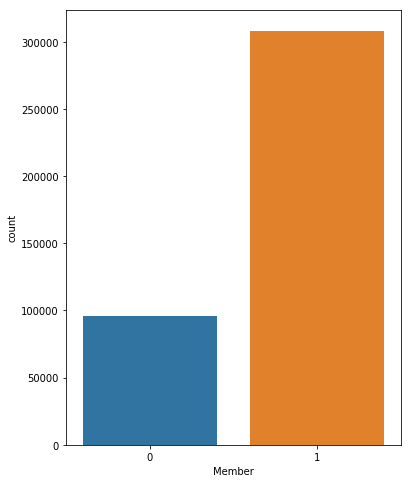

In [9]:
plt.figure(figsize=(6,8))
sns.countplot('Member', data=bike)

##  Start Station vs End Station for each Member and Non-Member

This plot looks quite confusing on first glance but on careful studying it can offer us some valuable insight into the actions of both Members and Non Members. Some conclusions we can draw from this are,

1. Members are more likely than Non-Members to travel further out of their station.
2. Start Station 31000 and 32000 are extremely popular starting and ending stations moreso than any other stations.
3. Station 32400 is used extremely less as both a starting station as well as an ending stations. 

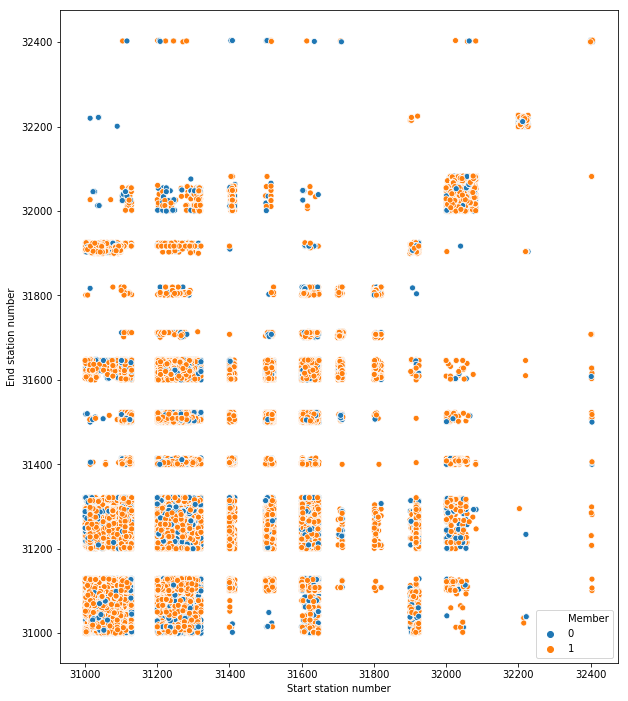

In [10]:
plt.figure(figsize=(10,12))
ax = sns.scatterplot(x='Start station number', y='End station number', data=bike, hue='Member')

## Scatterplot of Member vs Duration

This plot unfortunately does not seem to give us any further insights. 

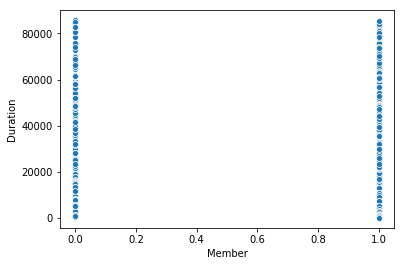

In [11]:
sns.scatterplot(x='Member',y='Duration',data=bike)

## Machine Learning

For this problem we will be using the following Machine Learning algorithms to classify users into Members and non-Members based on the features. 

1. Logistic Regression
2. Random Forest Algorithm
3. Decision Tree Algorithm
4. Gaussian Naive Bayes Algorithm

For analyzing the accuracy we will be using the Confusion Matrix as well as the classification reports from each algorithm.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403866 entries, 0 to 403865
Data columns (total 4 columns):
Duration                403866 non-null int64
Start station number    403866 non-null int64
End station number      403866 non-null int64
Member                  403866 non-null uint8
dtypes: int64(3), uint8(1)
memory usage: 9.6 MB


## Splitting data into Test set and Train set

Here we will be splitting the dataset into a 25/75 split of testing and training. 

X will be the data on which we are training the data with the features. 
y is the target class of Member. 

In [14]:
X = bike.drop('Member',axis=1)
y = bike['Member']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

             precision    recall  f1-score   support

          0       0.73      0.19      0.31     23847
          1       0.80      0.98      0.88     77120

avg / total       0.78      0.79      0.74    100967



array([[ 4606, 19241],
       [ 1696, 75424]])

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13870  9977]
 [11218 65902]]
             precision    recall  f1-score   support

          0       0.55      0.58      0.57     23847
          1       0.87      0.85      0.86     77120

avg / total       0.79      0.79      0.79    100967



## Random Forest

In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.71      0.58      0.64     23847
          1       0.88      0.93      0.90     77120

avg / total       0.84      0.85      0.84    100967

[[13877  9970]
 [ 5534 71586]]


## Gaussian Naive Bayes

In [18]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.75      0.14      0.24     23847
          1       0.79      0.99      0.88     77120

avg / total       0.78      0.79      0.72    100967

[[ 3328 20519]
 [ 1126 75994]]


## Conclusion

From the algorithms we tested we can see that Random Forest performed the best at 84% accuracy. Decision Trees, Logistic Regression and Naive Bayes performed similarly each within 78 and 79%. 